## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

### Grading

This homework is due **Jan. 31, 2019 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Ability to read in data - 10%
* Ability to describe data - 20%
* Ability to visualize data - 20%
* Ability to clean data - 20%
* Storytelling - 20%

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sqlite3
import csv
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

## Importing Files

In [81]:
## Import CSV file of wine quality data.
wine = pd.read_csv('winequality-red.csv')

In [82]:
## Import JSON file of Pokemon player information.
with open("pokedex.json", "r") as f:
    json_pokemon_data = json.load(f)
pokemon = pd.DataFrame(json_pokemon_data['pokemon'])

In [83]:
## Import titanic.csv file into SQL, use as a pandas Dataframe.
sql = sqlite3.connect('tita.db')
cur = sql.cursor()

cur.execute('DROP TABLE IF EXISTS Titanic;')
cur.execute('CREATE TABLE Titanic '
            '(PassengerID REAL, Survived REAL, Pclass REAL, Name TEXT, Sex TEXT, Age REAL, SibSp REAL, Parch REAL, Ticket TEXT, Fare REAL, Cabin TEXT, Embarked TEXT);')

with open('titanic.csv','r') as infile:
    rows = list(csv.reader(infile))
    cur.executemany('INSERT INTO Titanic VALUES(?,?,?,?,?,?,?,?,?,?,?,?);',rows)

tita = cur.execute('SELECT * FROM Titanic').fetchall()
cols = tita.pop(0)
tita1 = pd.DataFrame(columns=cols)

for i in range(12):
    l = []
    for j in range(len(tita)):
        l.append(tita[j][i])
    tita1.loc[:,cols[i]] = pd.Series(l)

## CSV Wine Dataset

In [84]:
## We see there is no missing data in the dataframe, which makes life a whole lot easier!
wine.info()
## We also see there is one columb of int64 type, thus more of a categorical data column. This is the column for 
## a machine learning problem, predicting quality by the different values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [85]:
## We grab the summary statistics, seeing there are several outliers in this equation. I would like to see where 
## some of these outliers sit on here, in comparison to their specific quality rating.

## There isn't any reason to change certain values into categorical data, as each column represents a specific 
## value, and none besides the quality column are integer/categorical data, thus we will keep the columns as real-
## valued data.
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Quality 5 : 42.589118198874296 %
Quality 6 : 39.89993746091307 %
Quality 7 : 12.445278298936834 %
Quality 4 : 3.314571607254534 %
Quality 8 : 1.125703564727955 %
Quality 3 : 0.6253908692933083 %


/Users/gabrielsmith/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


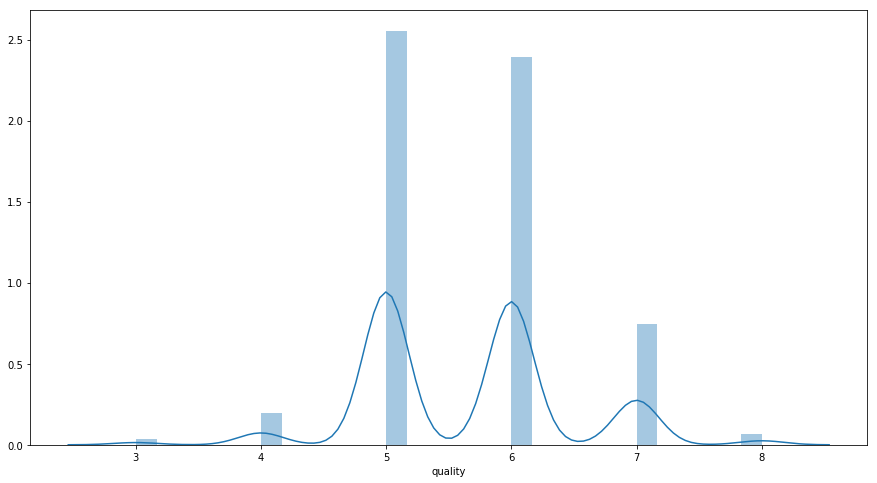

In [86]:
## Upon seeing the mean of quality being relatively average between the min 3 and max 8, I wanted to see the 
## percentage of 5 or 6 quality wine.
for i in wine['quality'].unique():
    print('Quality',i,':',len(wine[wine['quality'] == i])/len(wine)*100,'%')
## We see that over 80% of all ranks were either 5 or 6, giving it less than 1/8 chance of being ranked 7 and around
## 1% chance of being ranked 8. Thus it's difficult to model, and here is a histogram of the data.
sns.distplot(wine['quality'])
## I now want to analyze what qualitities are in each wine with 7 or greater quality.

In [87]:
## We now grab a subset of the wine dataset consisting of only quality 7 or greater wine. We label this subset wine1
wine1 = wine[wine['quality'] >= 7]

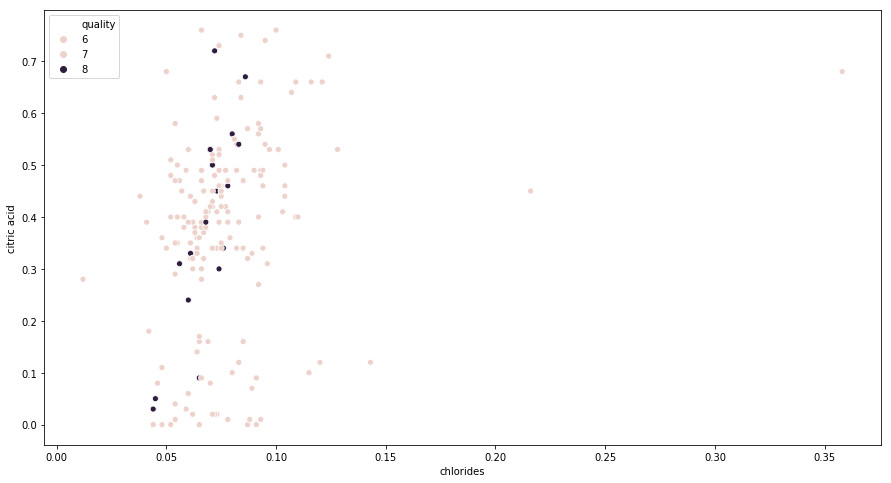

In [88]:
## We now plot wine1 data of chlorides against citric acid, with color hue differing by quality.
sns.scatterplot(wine1['chlorides'],wine1['citric acid'],hue=wine1['quality'])

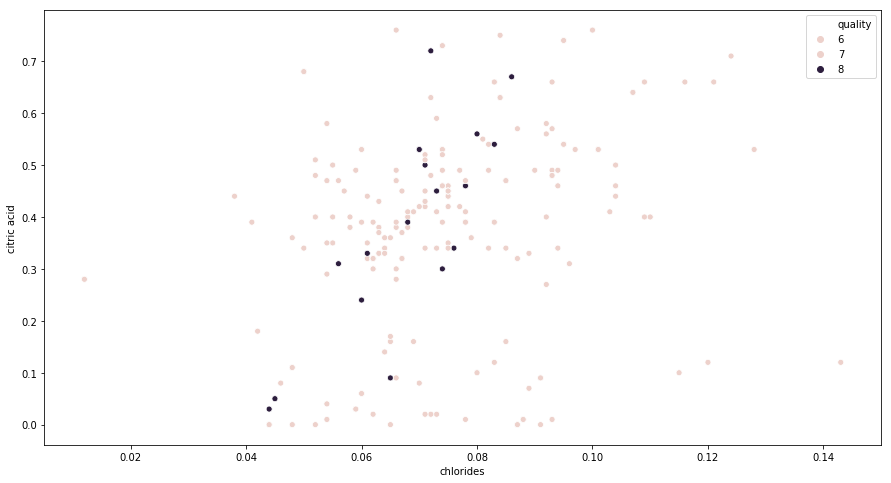

In [89]:
## We see that there are few data points with chloride concentration greater than 0.15, especially those of 
## high quality wine, thus I will get rid of the major outliers for the data. 
wine1 = wine1[wine1['chlorides'] <= 0.15]
sns.scatterplot(wine1['chlorides'],wine1['citric acid'],hue=wine1['quality'])

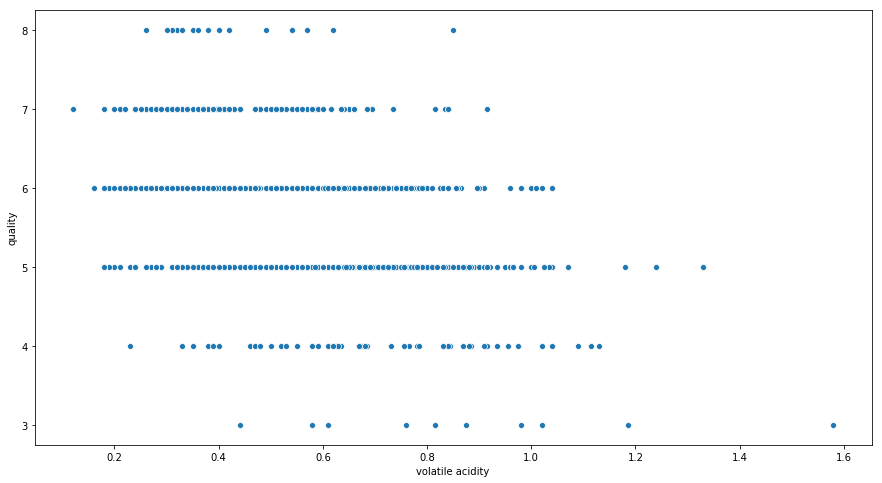

In [90]:
## Another section where outliers seem to exist are in volatile acidity. No values of wine quality greater than or
## equal to 7 have volatile acidity above 1. 
sns.scatterplot(wine['volatile acidity'],wine['quality'])

## Pokemon JSON Dataset

In [92]:
## Here is a previous of the pokemon dataset I have downloaded. This dataset gives information concerning 
## all types of Pokemon in a given set. 
## For this specific project, I want to find data on which pokemon is the most powerful, and I will be telling
## a small story to analyze this data.
pokemon.head(5)

,avg_spawns,candy,candy_count,egg,height,id,img,multipliers,name,next_evolution,num,prev_evolution,spawn_chance,spawn_time,type,weaknesses,weight
0,69.0,Bulbasaur Candy,25.0,2 km,0.71 m,1,http://www.serebii.net/pokemongo/pokemon/001.png,[1.58],Bulbasaur,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",001,NaN,0.690,20:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",6.9 kg
1,4.2,Bulbasaur Candy,100.0,Not in Eggs,0.99 m,2,http://www.serebii.net/pokemongo/pokemon/002.png,"[1.2, 1.6]",Ivysaur,"[{'num': '003', 'name': 'Venusaur'}]",002,"[{'num': '001', 'name': 'Bulbasaur'}]",0.042,07:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",13.0 kg
2,1.7,Bulbasaur Candy,NaN,Not in Eggs,2.01 m,3,http://www.serebii.net/pokemongo/pokemon/003.png,None,Venusaur,NaN,003,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",0.017,11:30,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",100.0 kg
3,25.3,Charmander Candy,25.0,2 km,0.61 m,4,http://www.serebii.net/pokemongo/pokemon/004.png,[1.65],Charmander,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",004,NaN,0.253,08:45,[Fire],"[Water, Ground, Rock]",8.5 kg
4,1.2,Charmander Candy,100.0,Not in Eggs,1.09 m,5,http://www.serebii.net/pokemongo/pokemon/005.png,[1.79],Charmeleon,"[{'num': '006', 'name': 'Charizard'}]",005,"[{'num': '004', 'name': 'Charmander'}]",0.012,19:00,[Fire],"[Water, Ground, Rock]",19.0 kg


In [93]:
## In the pokemon dataset, there are a lot more NULL values than the previous wine data set. Thus we will 
## analyze each of these, but also change some of these columns into real values instead of strings.
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
avg_spawns        151 non-null float64
candy             151 non-null object
candy_count       70 non-null float64
egg               151 non-null object
height            151 non-null object
id                151 non-null int64
img               151 non-null object
multipliers       70 non-null object
name              151 non-null object
next_evolution    70 non-null object
num               151 non-null object
prev_evolution    72 non-null object
spawn_chance      151 non-null float64
spawn_time        151 non-null object
type              151 non-null object
weaknesses        151 non-null object
weight            151 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 20.1+ KB


In [94]:
## I will be cleaning some of this data and turning it into integers for constructing greater analysis. Specifically
## for height, weight, # weaknesses, # types and # previous evolutions.
for i in range(len(pokemon['height'])):
    pokemon.loc[i,'height'] = np.float(pokemon.loc[i,'height'][:-2])
    pokemon.loc[i,'weight'] = float(pokemon.loc[i,'weight'][:-3])
    pokemon.loc[i,'num_weakness'] = len(pokemon.loc[i,'weaknesses'])
    pokemon.loc[i,'num_type'] = len(pokemon.loc[i,'type'])
    pokemon.loc[i,'num_prev_evol'] = len(pokemon.loc[i,'type'])

In [95]:
## There is a problem with both the weight and height columns, as they are not recognized as floats. Thus I will
## change each of them to a float object after putting them into a list.
h = []
w = []
for i in range(len(pokemon['weight'])):
    w.append(pokemon.loc[i,'weight'])
    h.append(pokemon.loc[i,'height'])
pokemon.loc[:,'height'] = h
pokemon.loc[:,'weight'] = w

In [96]:
## I will also create a different column of the rate of type over weakness.
pokemon.loc[:,'type_weakness_ratio'] = pokemon.loc[:,'num_type']/pokemon.loc[:,'num_weakness']

In [98]:
## I will now grab the summary statistics for the specific types of data in our set.
pokemon.loc[:,['avg_spawns','height','weight','num_weakness','num_type','type_weakness_ratio']].describe()
# We can pull a couple interesting insights from this page:
#     1. There are a couple major anomalies in the height, weight and average spawns columns. The max values 
#         each over 6 times the 75% quartile, thus causing the mean to well exceed the 50% quartile value. 
#         Thus we can dive in deeper into these values. 
#     2. Each pokemon has only one or two ingrained types for itself, and the rate doesn't exceed one. Hence
#         each pokemon has at least as many weaknesses as types. This is an interesting combination, where
#         we can pull insights from the data about each.


,avg_spawns,height,weight,num_weakness,num_type,type_weakness_ratio
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,53.992603,1.193841,45.951656,2.993377,1.410596,0.549038
std,111.156064,0.961873,59.447988,1.416553,0.493579,0.249070
min,0.000000,0.200000,0.100000,1.000000,1.000000,0.200000
25%,1.450000,0.710000,9.900000,2.000000,1.000000,0.333333
50%,7.200000,0.990000,30.000000,3.000000,1.000000,0.500000
75%,55.000000,1.500000,56.250000,4.000000,2.000000,0.500000
max,712.000000,8.790000,460.000000,7.000000,2.000000,1.000000


(array([50., 30., 22., 17.,  7.,  8.,  3.,  5.,  2.,  0.,  1.,  0.,  0.,
         2.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([1.0000e-01, 1.5430e+01, 3.0760e+01, 4.6090e+01, 6.1420e+01,
        7.6750e+01, 9.2080e+01, 1.0741e+02, 1.2274e+02, 1.3807e+02,
        1.5340e+02, 1.6873e+02, 1.8406e+02, 1.9939e+02, 2.1472e+02,
        2.3005e+02, 2.4538e+02, 2.6071e+02, 2.7604e+02, 2.9137e+02,
        3.0670e+02, 3.2203e+02, 3.3736e+02, 3.5269e+02, 3.6802e+02,
        3.8335e+02, 3.9868e+02, 4.1401e+02, 4.2934e+02, 4.4467e+02,
        4.6000e+02]),
 <a list of 30 Patch objects>)

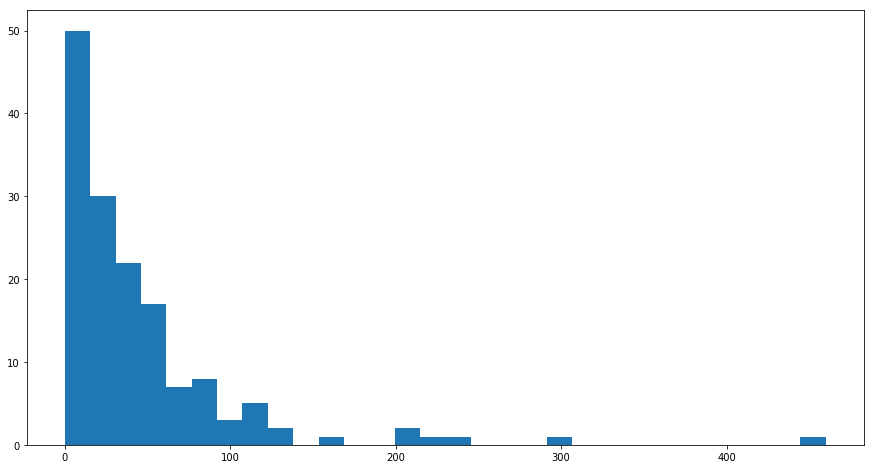

In [99]:
## There are only a few pokemon who have weights greater than 200 kilograms. This however may not give us the 
## knowledge we need, as weight does not necessarily translate to power. There are several other aspects that
## are difficult to find in this data including speed, power, defense, etc., that make it more difficult to 
## find which pokemon is the most powerful.
plt.hist(w,bins=30)

In [100]:
## We subset the data to see which pokemon have weight greater than 150 to do additional analysis.
weight = pokemon[pokemon['weight'] >= 150]

(array([21., 21., 36., 26., 23., 11.,  6.,  3.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.2       , 0.48633333, 0.77266667, 1.059     , 1.34533333,
        1.63166667, 1.918     , 2.20433333, 2.49066667, 2.777     ,
        3.06333333, 3.34966667, 3.636     , 3.92233333, 4.20866667,
        4.495     , 4.78133333, 5.06766667, 5.354     , 5.64033333,
        5.92666667, 6.213     , 6.49933333, 6.78566667, 7.072     ,
        7.35833333, 7.64466667, 7.931     , 8.21733333, 8.50366667,
        8.79      ]),
 <a list of 30 Patch objects>)

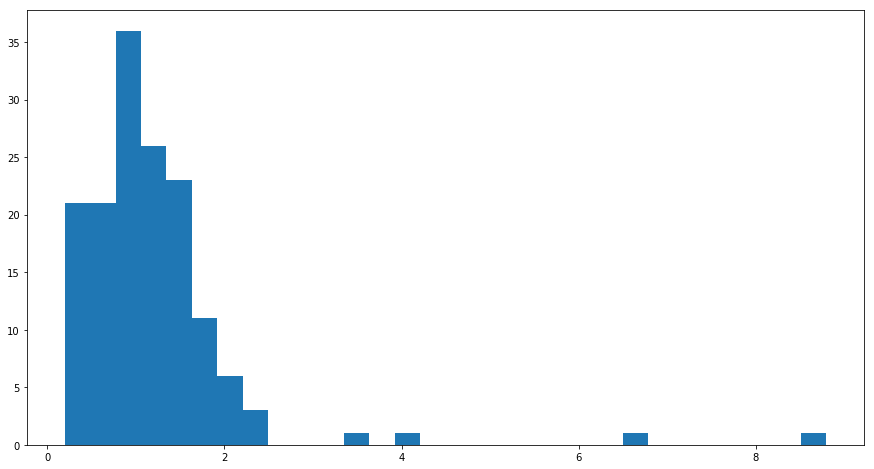

In [101]:
## We also see that most pokemon are not very tall, with almost 90% of them never reaching above 2 meters tall. 
## However there are some pokemon who are tall which can relate to power.
plt.hist(h,bins=30)

In [102]:
## We then subset the data based on height, grabbing the pokemon with a height greater than 1.5 meters.
height = pokemon[pokemon['height'] >= 1.5]

(array([ 1.,  0.,  0.,  2., 47.,  0.,  0.,  7.,  0.,  0.,  0., 58.,  0.,
         0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 32.]),
 array([0.2       , 0.22666667, 0.25333333, 0.28      , 0.30666667,
        0.33333333, 0.36      , 0.38666667, 0.41333333, 0.44      ,
        0.46666667, 0.49333333, 0.52      , 0.54666667, 0.57333333,
        0.6       , 0.62666667, 0.65333333, 0.68      , 0.70666667,
        0.73333333, 0.76      , 0.78666667, 0.81333333, 0.84      ,
        0.86666667, 0.89333333, 0.92      , 0.94666667, 0.97333333,
        1.        ]),
 <a list of 30 Patch objects>)

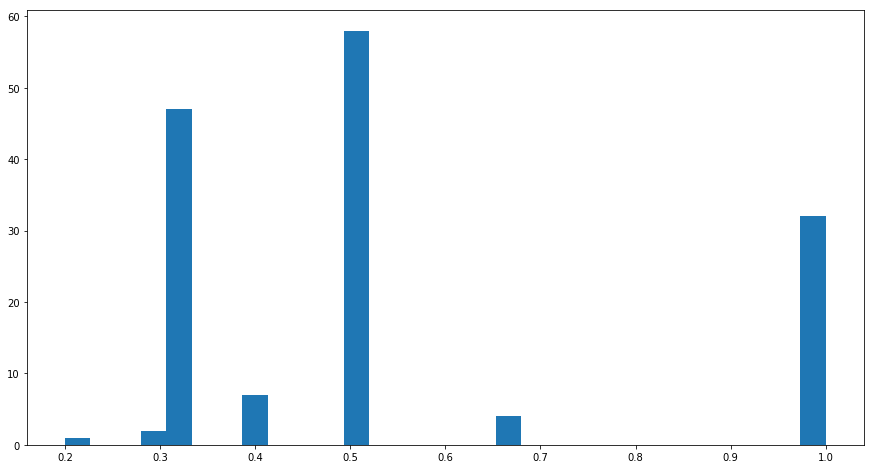

In [103]:
## Upon the initial analysis, we see that roughly 70% of pokemon have a rate of 50% or 100% of their types against
## their weaknesses. We can find which pokemon would be most difficult to attack are those with a low number
## of weaknesses.
plt.hist(pokemon['type_weakness_ratio'],bins=30)

In [104]:
## We now subset pokemon with a relatively higher rate, at least above 50%.
weak = pokemon[pokemon['type_weakness_ratio'] > .5]

In [105]:
## We can check the index values against each other, seeing which pokemon are in all two/three of these sections.
print(weak.index)
print(height.index)
print(weight.index)

Int64Index([  5,  15,  16,  17,  18,  19,  20,  21,  24,  25,  34,  35,  38,
             39,  51,  52,  71,  72,  82,  83,  84,  99, 100, 107, 112, 114,
            124, 127, 129, 131, 132, 134, 136, 142, 144, 145],
           dtype='int64')
Int64Index([  2,   5,   8,  17,  22,  23,  41,  48,  54,  58,  64,  66,  67,
             70,  72,  77,  79,  84,  86,  90,  92,  93,  94,  96, 102, 105,
            111, 114, 122, 126, 129, 130, 141, 142, 143, 144, 145, 146, 147,
            148, 149],
           dtype='int64')
Int64Index([58, 75, 94, 129, 130, 142, 148], dtype='int64')


In [106]:
## We will create a new column for how many times these pokemon are in each subset of the data.
pokemon.loc[:,'power_rate'] = np.zeros(len(pokemon))
for i in range(len(pokemon)):
    if i in weak.index:
        pokemon.loc[i,'power_rate'] += 1
    if i in height.index:
        pokemon.loc[i,'power_rate'] += 1
    if i in weight.index:
        pokemon.loc[i,'power_rate'] += 1

In [107]:
## We will find which pokemon are in at least two of these sections and determine these to be the most powerful.
pokemon.sort_values(by='power_rate',ascending=False).loc[:,'name'].head(10)

142       Snorlax
129      Gyarados
145       Moltres
72     Tentacruel
114    Kangaskhan
58       Arcanine
17        Pidgeot
84         Dodrio
144        Zapdos
94           Onix
Name: name, dtype: object

In [108]:
## Upon looking at this list, these would be the highest candidates for the most powerful pokemon in the 
## game based off of weakness rate, height and weight. We would need more statistics and information 
## concerning the pokemon to figure out which would be the most powerful. However, this does give us
## a good estimate of the data.

## Titanic Data Set

In [112]:
## Here is the original data set I will use before exploration.
tita1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22,1.0,0.0,A/5 21171,7.2500,,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26,0.0,0.0,STON/O2. 3101282,7.9250,,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35,0.0,0.0,373450,8.0500,,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,,0.0,0.0,330877,8.4583,,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2,3.0,1.0,349909,21.0750,,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0.0,2.0,347742,11.1333,,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1.0,0.0,237736,30.0708,,C


In [114]:
## Here are the summary statistics for this project.
tita1.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [126]:
## We see that only 38% of the entire ship survived the crash, hence I would like to see what things were most 
## important to surviving. We also see that around 2/3 women survived the crash while only 1/3 of the survivors 
## were male, showing how men were very courteous back then!
print(sum(tita1['Survived'])/len(tita1))
print(sum(tita1[tita1['Sex'] == 'male']['Survived'])/len(tita1))
print(sum(tita1[tita1['Sex'] == 'female']['Survived'])/len(tita1))

0.3838383838383838
0.122334455667789
0.2615039281705948


In [123]:
## Convert each null value to 0 for age. 
for i in range(len(tita1)):
    if tita1.loc[i,'Age'] == '':
        tita1.loc[i,'Age'] = 0

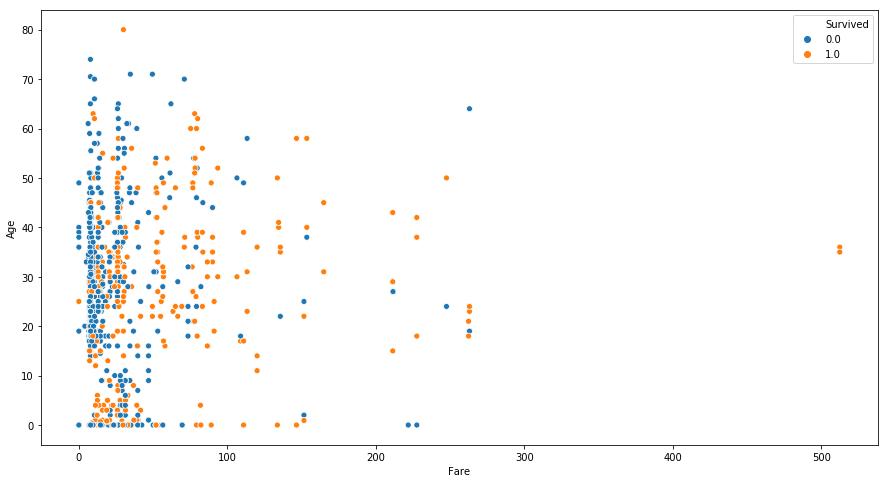

In [124]:
## We see that in this data set, the age of the passenger does not have a major significance on who survived or not. 
## However, the fare definitely seems to be important; the higher people paid, the more likely they were to 
## survive the crash. 
sns.scatterplot(tita1['Fare'],tita1['Age'],hue=tita1['Survived'])

In [118]:
tita1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null float64
Survived       891 non-null float64
Pclass         891 non-null float64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null object
SibSp          891 non-null float64
Parch          891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(6), object(6)
memory usage: 83.6+ KB
